In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(lmerTest)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data <- read.csv("../input/test-students/test.csv")
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




,test,ttt,school
,<dbl>,<int>,<int>
1,6.7,1,1
2,6.3,1,1
3,6.3,1,1
4,5.6,1,1
5,6.1,1,1
6,6.6,1,1


In [2]:
summary(data)

      test            ttt        school  
 Min.   :1.300   Min.   :1   Min.   : 1  
 1st Qu.:4.700   1st Qu.:1   1st Qu.: 6  
 Median :5.300   Median :2   Median :11  
 Mean   :5.397   Mean   :2   Mean   :11  
 3rd Qu.:6.200   3rd Qu.:3   3rd Qu.:16  
 Max.   :9.000   Max.   :3   Max.   :21  

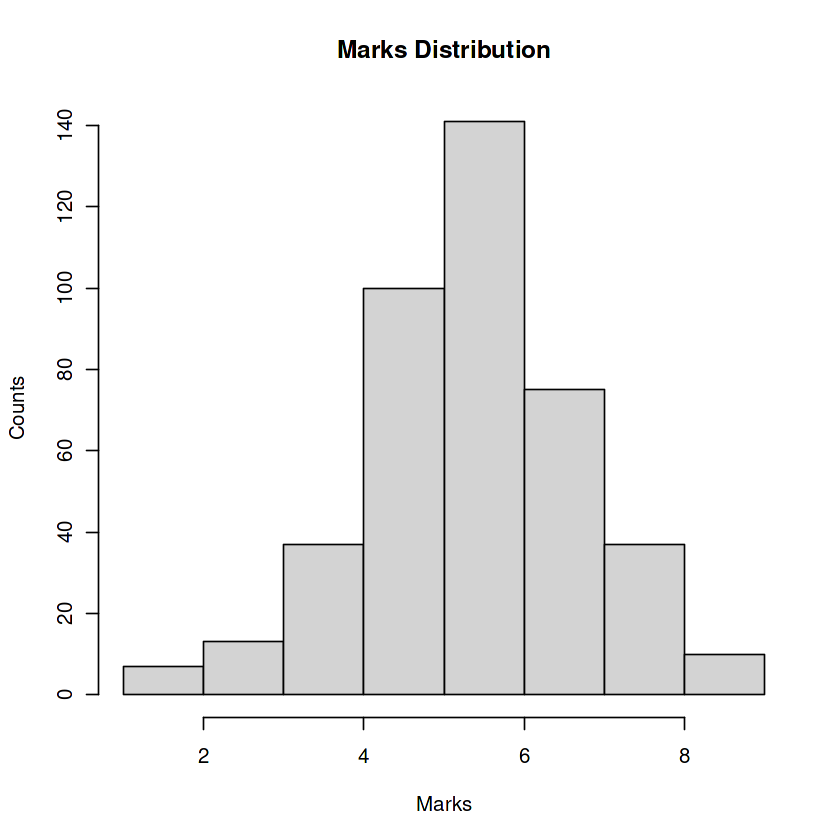

In [3]:
# Proper use of hist with title and axis label
hist(data$test, main = "Marks Distribution", xlab = "Marks", ylab = "Counts")


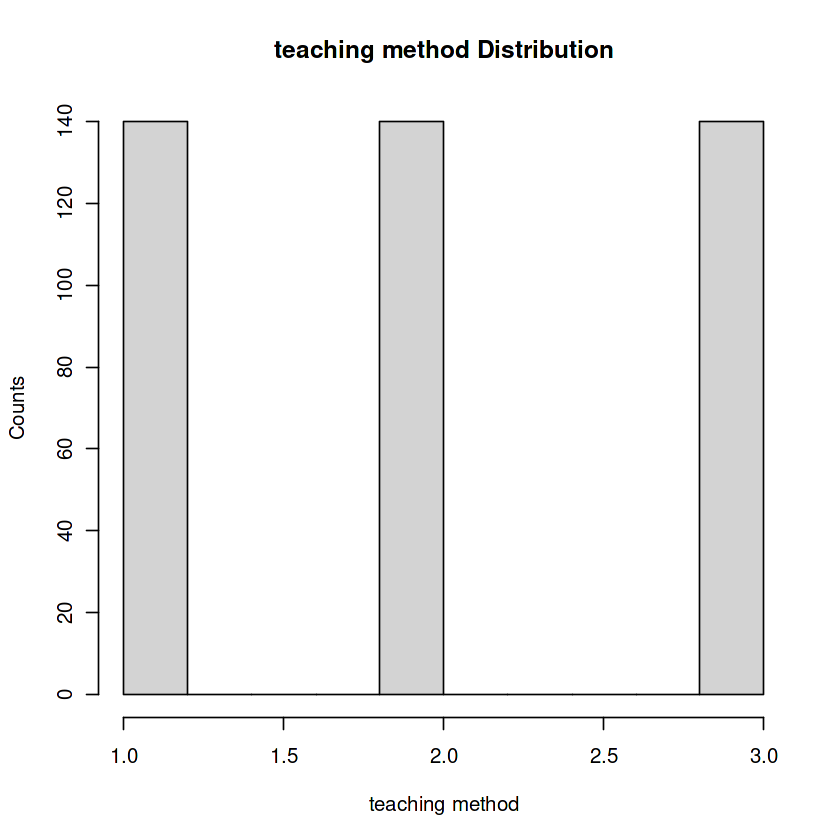

In [4]:
hist(data$ttt, main = "teaching method Distribution", xlab = "teaching method", ylab = "Counts")


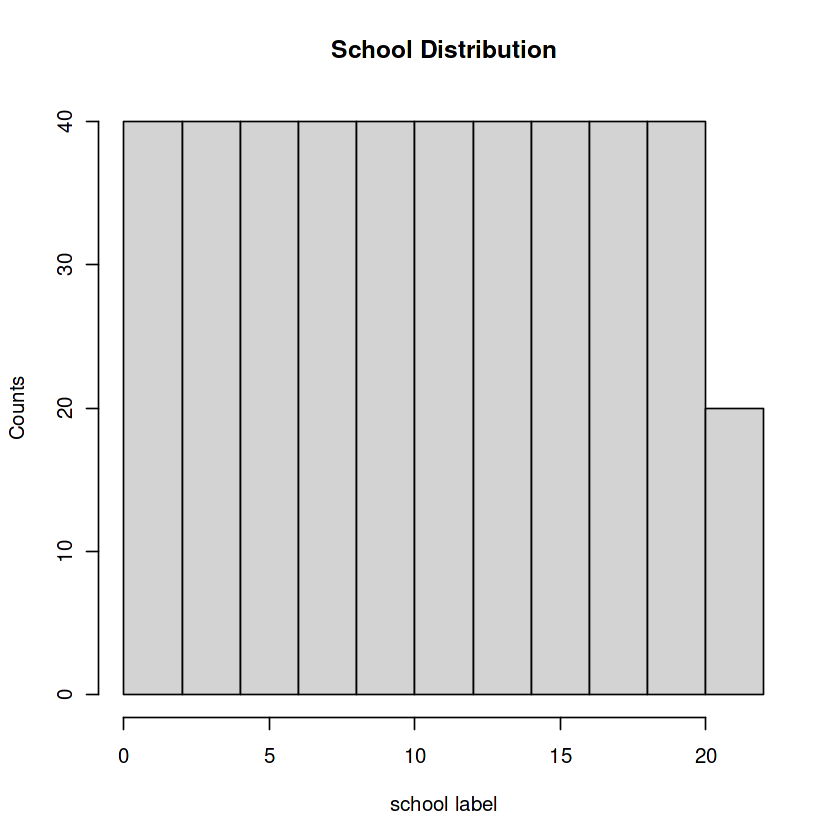

In [5]:
hist(data$school, main = "School Distribution", xlab = "school label", ylab = "Counts")


In [6]:
lapply(data, unique)


$test
 [1] 6.7 6.3 5.6 6.1 6.6 7.0 6.5 5.7 6.9 6.2 4.7 5.3 5.5 5.0 4.8 5.2 4.5 5.8 4.9
[20] 4.6 5.4 5.1 3.6 4.0 3.0 4.2 3.5 3.3 4.1 3.7 3.9 3.2 6.0 6.4 5.9 4.4 3.8 4.3
[39] 7.6 9.0 7.8 7.2 8.0 7.9 8.1 7.7 8.3 8.9 8.4 8.5 7.3 7.1 7.5 2.7 7.4 6.8 2.6
[58] 3.1 1.5 1.9 2.0 1.3 1.6 2.3 2.2 2.8 2.1

$ttt
[1] 1 2 3

$school
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

In [7]:
summary(data)

# Grouped summary by teaching method
library(dplyr)
print(dim(data))

      test            ttt        school  
 Min.   :1.300   Min.   :1   Min.   : 1  
 1st Qu.:4.700   1st Qu.:1   1st Qu.: 6  
 Median :5.300   Median :2   Median :11  
 Mean   :5.397   Mean   :2   Mean   :11  
 3rd Qu.:6.200   3rd Qu.:3   3rd Qu.:16  
 Max.   :9.000   Max.   :3   Max.   :21  

[1] 420   3


we should apply a 2 way anova, since we have many "categorical" independent variables ie school and ttt

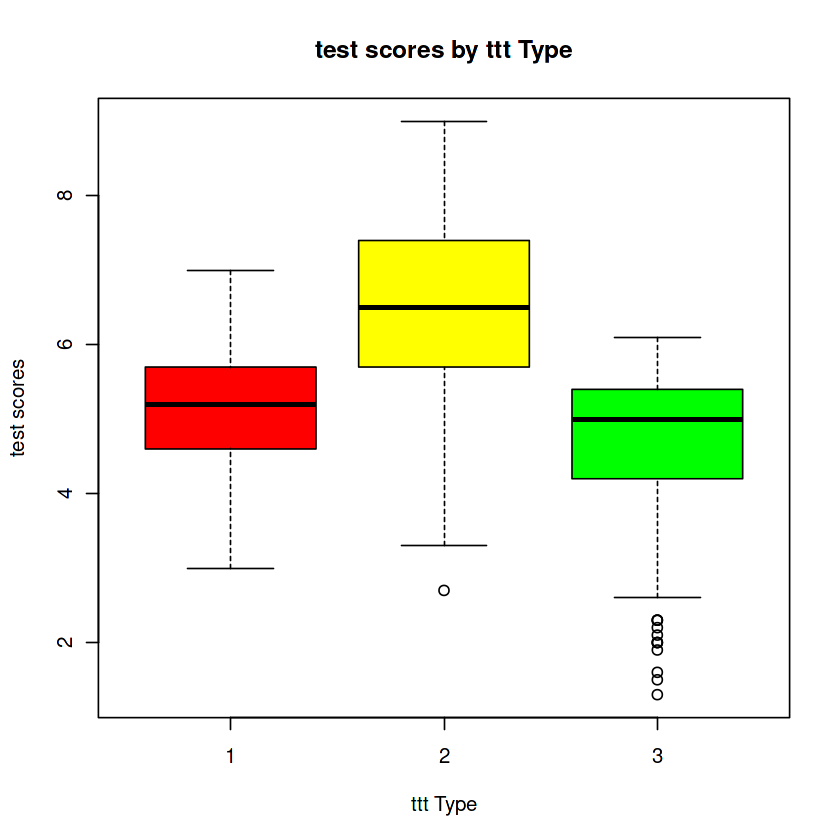

In [8]:
boxplot(test ~ ttt, data = data, main = "test scores by ttt Type",
        xlab = "ttt Type", ylab = "test scores", col = rainbow(6))


In [9]:


# Check if each school adopts only one teaching method
result <- data %>%
  group_by(school) %>%
  summarise(
    unique_methods = n_distinct(ttt), # Count distinct methods
    methods = paste(unique(ttt), collapse = ", ") # List methods as a string
  ) %>%
  mutate(single_method = unique_methods == 1) # TRUE if only one method
print(as.data.frame(result))

   school unique_methods methods single_method
1       1              1       1          TRUE
2       2              1       1          TRUE
3       3              1       1          TRUE
4       4              1       1          TRUE
5       5              1       1          TRUE
6       6              1       1          TRUE
7       7              1       1          TRUE
8       8              1       2          TRUE
9       9              1       2          TRUE
10     10              1       2          TRUE
11     11              1       2          TRUE
12     12              1       2          TRUE
13     13              1       2          TRUE
14     14              1       2          TRUE
15     15              1       3          TRUE
16     16              1       3          TRUE
17     17              1       3          TRUE
18     18              1       3          TRUE
19     19              1       3          TRUE
20     20              1       3          TRUE
21     21    

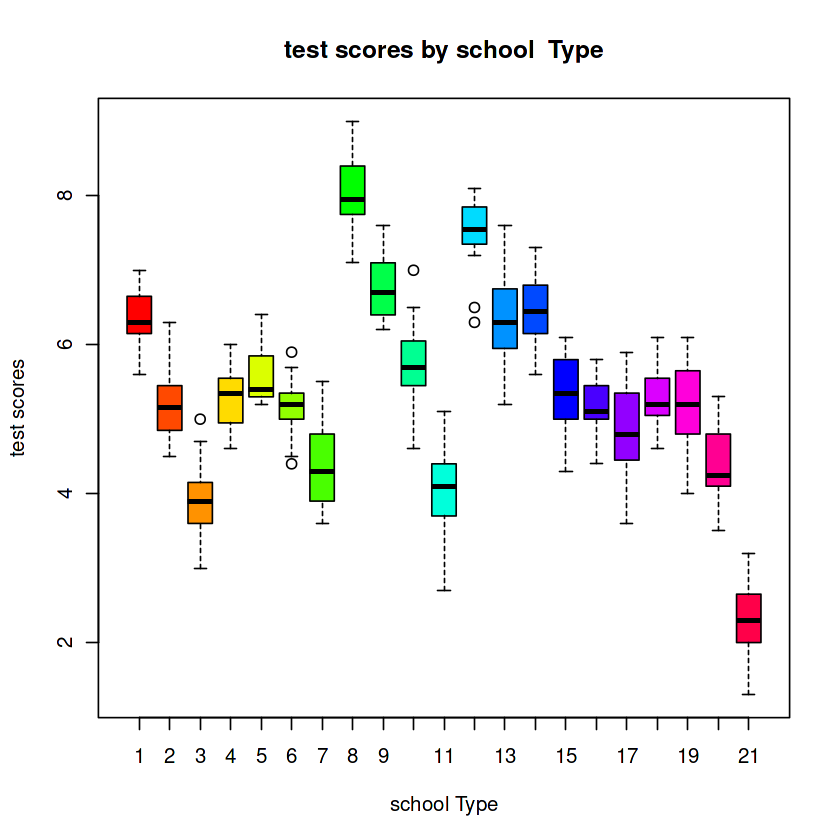

In [10]:
boxplot(test ~ school, data = data, main = "test scores by school  Type",
        xlab = "school Type", ylab = "test scores", col = rainbow(21))


Number of Levels:

When a factor (e.g., school) has many levels relative to the other factor(s), it is often treated as a random effect in statistical modeling.
Reason: Instead of estimating a separate fixed effect for each school (21 parameters), we assume the schools are drawn from a population distribution. This approach reduces the number of parameters to estimate while capturing the variability across schools.

#------ formal analysis

In [11]:
#treating school as a factor variable
data$school <- as.factor(data$school)
data$ttt <- as.factor(data$ttt)



In [12]:
#linear model with random effects
# Load the lme4 package for mixed-effects modeling
library(lme4)


# Fit the two-factor ANOVA model with random effects
#model <- lmer(test ~ ttt * school + (1 | school))
model <- lmer(test ~ ttt + (1 | school), data = data)


# View the model summary
summary(model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: test ~ ttt + (1 | school)
   Data: data

REML criterion at convergence: 689.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.83181 -0.61447 -0.07317  0.66463  2.57447 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 1.1533   1.0739  
 Residual             0.2425   0.4924  
Number of obs: 420, groups:  school, 21

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   5.1214     0.4080 18.0000  12.552 2.44e-10 ***
ttt2          1.3007     0.5770 18.0000   2.254   0.0369 *  
ttt3         -0.4729     0.5770 18.0000  -0.819   0.4232    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
     (Intr) ttt2  
ttt2 -0.707       
ttt3 -0.707  0.500

In [13]:
anova(model)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ttt,2.457069,1.228535,2,18,5.066384,0.01796969


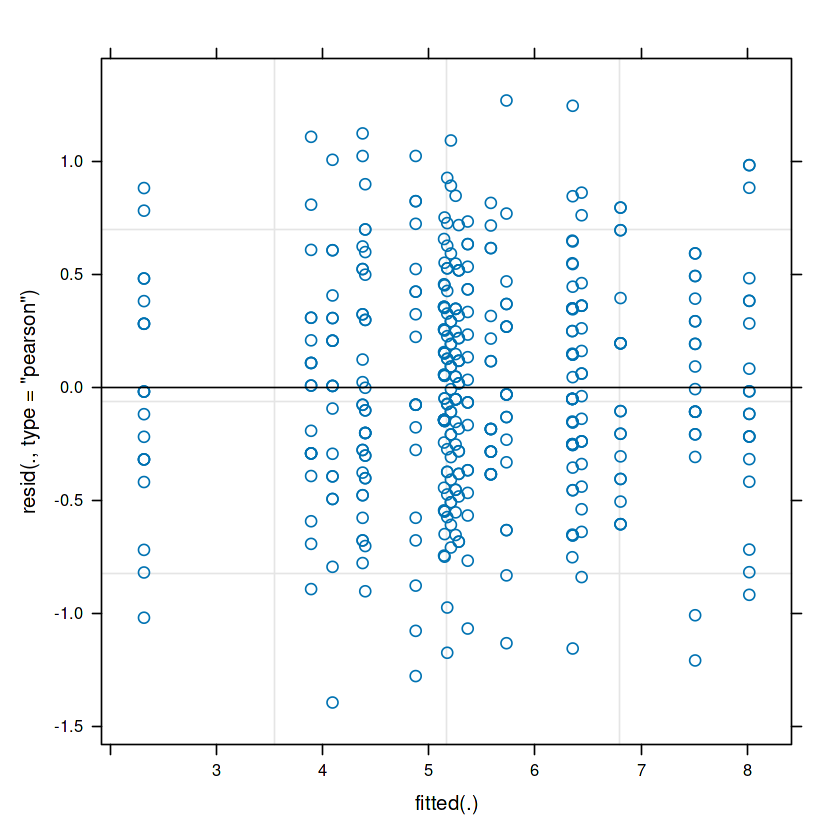

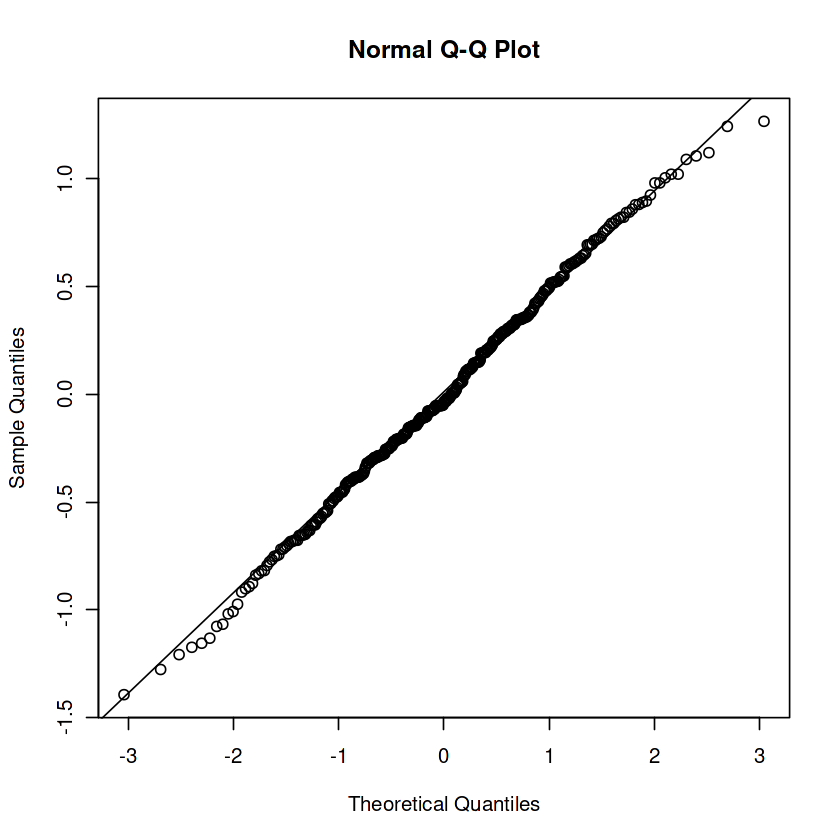

In [14]:
plot(model)
qqnorm(resid(model))
qqline(resid(model))

## p value for LRT testing significance of random effects

In [15]:
model_null=lm(test ~ ttt , data = data)
pchisq(as.numeric(2 * (logLik(model, REML = FALSE) - logLik(model_null))), 1, lower.tail = FALSE)


[1] 4.350527e-130

## p value for LRT testing significance of fixed effects

In [16]:
reduced_model <- lmer(test ~ (1 | school), data = data, REML = FALSE)
pchisq(as.numeric(2 * (logLik(model) - logLik(reduced_model))), df = 1, lower.tail = FALSE)




[1] 0.002321973

In [17]:
#icc
 var_school = 1.1533
 var_residual = 0.2425
 # Calculating the Intraclass Correlation Coefficient (ICC)
 icc = var_school / (var_school + var_residual)
 icc

[1] 0.8262645